In [2]:
# import libraries
import numpy as np
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels as sm
import sklearn as skl
import sklearn.metrics as skm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# access files stored on Google Drive from Colab
#from google.colab import drive
#drive.mount('gdrive/')



In [22]:
# read in datasets
glmTest = pd.read_csv("glm.test.data.csv")
glmTrain = pd.read_csv("glm.training.data.csv")
testOnsetini = pd.read_csv("test.onsets.csv")
testTSini = pd.read_csv("timestamps.test.csv")

# create duplicates of datasets
testTS=testTSini
testOnset=testOnsetini
glmTrain2=glmTrain

# filtering out bpm <=20 or > 500, since lowest and highest ventricular heart rate ever recorded is 28 and 480 respectively
glmTrain2=glmTrain2.drop(glmTrain2[(glmTrain2['x.hr']<=20) | (glmTrain2['x.hr']>500)].index) 
# filter out duplicate data from same sample
#keys=glmTrain2.keys().drop('Unnamed: 0','y').tolist()
#glmTrain2=glmTrain2.groupby(keys).mean().reset_index(level=list(range(0,len(keys))))
# filter fahrenheit: highest recorded 114F (45C) lowest 57F
glmTrain2['x.temp']=np.where(glmTrain2['x.temp']>50, (glmTrain2['x.temp']-32)*5/9, glmTrain2['x.temp'])

# normalize data
scaler = skl.preprocessing.StandardScaler()
x_train = glmTrain2.drop(["Unnamed: 0","y"],axis=1)
x_trainDM = scaler.fit_transform(glmTrain2.drop(["Unnamed: 0","y"],axis=1))
y_train=glmTrain2["y"].values

# make empty AUC array to store lambda and AUC values
allAUC=[]

D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 358.6415292518941, tolerance: 16.309191914069316
  positive)


0.0001 [ 0.04369867 -0.00474048 -0.00033814 -0.0124157   0.01357826  0.00049514
 -0.00026538  0.02912454  0.01409719 -0.22452149 -0.00057298 -0.04468701
 -0.          0.04288239  0.         -0.00068202  0.0510844  -0.00796961
 -0.0067344   0.00746854 -0.00024765 -0.02863265  0.03826192 -0.19777123
  0.12088042  0.02384399  0.00193068  0.00879402]
0.00021544346900318845 [ 4.35329716e-02 -4.67386890e-03 -2.57757510e-04 -1.23345363e-02
  1.34472545e-02  3.71074208e-04 -1.49881652e-04  2.90882772e-02
  1.40237722e-02 -2.23996956e-01 -4.27740079e-04 -3.20372644e-02
 -0.00000000e+00  4.28752781e-02 -0.00000000e+00 -5.51589111e-04
  3.15479162e-02 -7.86157825e-03  0.00000000e+00  7.41350377e-03
 -0.00000000e+00 -2.85832066e-02  3.80261959e-02 -1.97306089e-01
  1.20887551e-01  2.38190197e-02  2.97855663e-03  8.73561057e-03]
0.00046415888336127773 [ 4.31570033e-02 -4.52978684e-03 -8.42300778e-05 -1.21523123e-02
  1.31591171e-02  1.04160239e-04 -0.00000000e+00  2.90169000e-02
  1.38702908e-02 -2

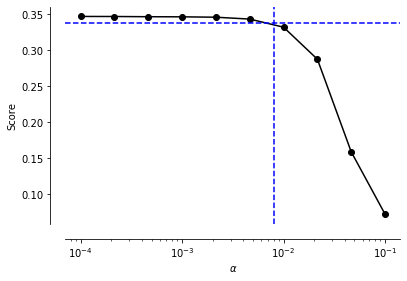

In [8]:
import matplotlib.pyplot as plt
import numpy as np

import sklearn.datasets
import sklearn.model_selection as cv
from sklearn import linear_model

X = x_trainDM
y = y_train
X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=0.25, random_state=0)

alphas = np.logspace(-4, -1, 10)
scores = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso(max_iter=2000)
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
    print(a, lasso.coef_)
    
lassocv = linear_model.LassoCV(cv=10,max_iter=2000)
lassocv.fit(X, y)
lassocv_score = lassocv.score(X, y)
lassocv_alpha = lassocv.alpha_
print('CV', lassocv.coef_)

plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=15)

In [10]:
lasso = linear_model.Lasso(max_iter=2000)
lasso.set_params(alpha=lassocv_alpha)
lasso.fit(X_train, y_train)
scores[i] = lasso.score(X_test, y_test)
print(lasso.coef_)




[ 3.79879645e-02 -1.16472761e-04 -0.00000000e+00 -5.62474625e-03
  6.26156883e-03  0.00000000e+00  0.00000000e+00  2.25251131e-02
  8.30618865e-03 -1.81693904e-01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  3.99951641e-02 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -5.12443410e-04 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -2.52948198e-02  2.44943685e-02 -1.56595134e-01
  1.18943971e-01  1.95693861e-02  1.44677142e-05  1.20616404e-03]


In [12]:
# create duplicates of datasets
glmTest2=glmTest

# filtering out bpm <=20 or > 500, since lowest and highest ventricular heart rate ever recorded is 28 and 480 respectively
glmTest2=glmTest2.drop(glmTest2[(glmTest2['hr']<=20) | (glmTest2['hr']>500)].index) 
# filter out duplicate data from same sample
#keys=glmTrain2.keys().drop('Unnamed: 0','y').tolist()
#glmTrain2=glmTrain2.groupby(keys).mean().reset_index(level=list(range(0,len(keys))))
# filter fahrenheit: highest recorded 114F (45C) lowest 57F
glmTest2['temp']=np.where(glmTest2['temp']>50, (glmTest2['temp']-32)*5/9, glmTest2['temp'])

# normalize data
scaler = skl.preprocessing.StandardScaler()
x_test = glmTest2.drop(["Unnamed: 0","y"],axis=1)
x_testDM = scaler.fit_transform(glmTest2.drop(["Unnamed: 0","y","patient"],axis=1))
y_test=glmTest2["y"].values

In [26]:
pred_probas_ = lasso.predict(x_trainDM)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = skm.roc_curve(y_train, pred_probas_)

# find shortest distance to tpr=1,fpr=0 to determine optimal threshold
roc_values=np.transpose(np.vstack((fpr,tpr)))
dist=np.empty((roc_values.shape[0],1))
for i in range(0,roc_values.shape[0]):
    dist[i]=np.linalg.norm((0,1)-roc_values[i])
x_coord = roc_values[np.argmin(dist)][0]
y_coord = roc_values[np.argmin(dist)][1]

# calculate AUC
roc_auc = skm.roc_auc_score(y_train,pred_probas_)
print(skm.accuracy_score(y_train, lasso.predict(x_trainDM)))
print(1-np.sum(y_train)/y_train.shape[0])

# plot ROC curve
plt.plot(fpr, tpr, lw=1, label='Optimized AUC = %0.2f' % (roc_auc))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for test data at optimal lambda =%0.2f' % lassocv_alpha)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.plot(x_coord,y_coord,'ko',label='Operating Point')

plt.text(x_coord, y_coord, '({}, {})'.format(round(x_coord,5), round(y_coord,5)))
plt.show()

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [25]:
x_trainDM.shape

(1576071, 28)